# Preparación de los datos

## Extracción del Archivo Tratado

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/popex404/Desafio-Telecom-X-parte2/refs/heads/main/clientes%20(1).csv"
clientes = pd.read_csv(url)
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   bool   
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   bool   
 4   Partner           7043 non-null   bool   
 5   Dependents        7043 non-null   bool   
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   bool   
 8   MultipleLines     7043 non-null   bool   
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   bool   
 11  OnlineBackup      7043 non-null   bool   
 12  DeviceProtection  7043 non-null   bool   
 13  TechSupport       7043 non-null   bool   
 14  StreamingTV       7043 non-null   bool   
 15  StreamingMovies   7043 non-null   bool   
 16  Contract          7043 non-null   object 


Churn es la variable dependiente que queremos analizar/explorar, por lo que sera necesario convertirla a binario junto a otras columnas.

customerID es un indice y es irrelevante para el modelo predictivo



## Eliminación de Columnas Irrelevantes

In [3]:
clientes = clientes.drop(columns=["customerID"])
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   bool   
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   bool   
 3   Partner           7043 non-null   bool   
 4   Dependents        7043 non-null   bool   
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   bool   
 7   MultipleLines     7043 non-null   bool   
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   bool   
 10  OnlineBackup      7043 non-null   bool   
 11  DeviceProtection  7043 non-null   bool   
 12  TechSupport       7043 non-null   bool   
 13  StreamingTV       7043 non-null   bool   
 14  StreamingMovies   7043 non-null   bool   
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   bool   


## Encoding

In [4]:
clientes.describe()

,tenure,Charges.Monthly,Charges.Total,Charges.Daily
count,7043.000000,7043.000000,7032.000000,7043.000000
mean,32.371149,64.761692,2283.300441,2.127521
std,24.559481,30.090047,2266.771362,0.988435
min,0.000000,18.250000,18.800000,0.600000
25%,9.000000,35.500000,401.450000,1.170000
50%,29.000000,70.350000,1397.475000,2.310000
75%,55.000000,89.850000,3794.737500,2.950000
max,72.000000,118.750000,8684.800000,3.900000


In [5]:
clientes.describe(include='O')

,gender,InternetService,Contract,PaymentMethod
count,7043,7043,7043,7043
unique,2,3,3,4
top,Male,Fiber optic,Month-to-month,Electronic check
freq,3555,3096,3875,2365


Primero arreglaremos el formato de las columnas binarias/booleanas con el uso de una función.

In [6]:
def transformar_binario(df, columna):
    # Validar que df sea un DataFrame
    if not isinstance(df, pd.DataFrame):
        raise TypeError("El argumento 'df' debe ser un DataFrame de pandas.")

    # Si columna es string, convertirlo a lista para unificar el manejo
    if isinstance(columna, str):
        columnas = [columna]
    elif isinstance(columna, list):
        columnas = columna
    else:
        raise TypeError("El argumento 'columna' debe ser una cadena o una lista de cadenas.")

    for col in columnas:
        # Verificar que la columna exista en el DataFrame
        if col not in df.columns:
            raise ValueError(f"La columna '{col}' no existe en el DataFrame.")

        # Obtener los valores únicos de la columna
        valores_unicos = df[col].dropna().unique()

        # Validar que tenga exactamente 2 valores distintos (sin contar NaN)
        if len(valores_unicos) != 2:
            raise ValueError(f"La columna '{col}' no tiene exactamente 2 valores únicos.")

        # Reemplazar True por 1 y False por 0
        df[col] = df[col].replace({False: 0, True: 1})

    return df

test_cliente = clientes.copy()
test_cliente = transformar_binario(test_cliente, 'Churn')
test_cliente = transformar_binario(test_cliente, ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling'])
test_cliente['gender'] = test_cliente['gender'].replace({'Female': 0, 'Male': 1})
test_cliente.sample(3)

/tmp/ipython-input-375736913.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({False: 0, True: 1})
/tmp/ipython-input-375736913.py:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_cliente['gender'] = test_cliente['gender'].replace({'Female': 0, 'Male': 1})


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Daily
6304,0,1,0,1,1,60,1,0,No,0,...,0,0,0,0,Two year,0,Credit card (automatic),19.65,1161.75,0.65
6992,1,0,0,0,0,14,1,1,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,80.45,1072.00,2.64
5302,0,1,0,1,1,7,0,0,DSL,1,...,1,0,0,0,Two year,0,Mailed check,38.55,280.00,1.27


Ahora es necesario arreglar las columnas categoricas.

In [7]:
categoricas = ['InternetService','Contract','PaymentMethod']
pd.get_dummies(data=test_cliente,columns=categoricas, dtype=int).head()

datos_codificados =pd.get_dummies(data=test_cliente,columns=categoricas, dtype=int)
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Churn                                    7043 non-null   int64  
 1   gender                                   7043 non-null   int64  
 2   SeniorCitizen                            7043 non-null   int64  
 3   Partner                                  7043 non-null   int64  
 4   Dependents                               7043 non-null   int64  
 5   tenure                                   7043 non-null   int64  
 6   PhoneService                             7043 non-null   int64  
 7   MultipleLines                            7043 non-null   int64  
 8   OnlineSecurity                           7043 non-null   int64  
 9   OnlineBackup                             7043 non-null   int64  
 10  DeviceProtection                         7043 no

Ahora que todas las columnas son numericas, es posible empezar con el analisis estadistico.

### Análisis de variables

Es imposible poder visualizar bien una matriz de correlación para 28 columnas, por lo que evaluare las correlacciones en pares y con el valor absoluto podre obtener en el top las columnas con mayor correlación.

In [8]:
correlation_matrix = datos_codificados.corr(numeric_only=True)
correlation_pairs = correlation_matrix.abs().unstack()

# Eliminar autocorrelaciones (correlación de una variable consigo misma)
correlation_pairs = correlation_pairs[correlation_pairs.index.get_level_values(0) != correlation_pairs.index.get_level_values(1)]

# Eliminar pares duplicados (A,B) y (B,A)
correlation_pairs = correlation_pairs.drop_duplicates()
top_correlations = correlation_pairs.sort_values(ascending=False)
print(top_correlations.head(20))

Charges.Monthly          Charges.Daily                  0.999996
tenure                   Charges.Total                  0.825880
Charges.Monthly          InternetService_Fiber optic    0.787066
Charges.Daily            InternetService_Fiber optic    0.787049
Charges.Monthly          InternetService_No             0.763557
Charges.Daily            InternetService_No             0.763513
Charges.Total            Charges.Daily                  0.651102
Charges.Monthly          Charges.Total                  0.651065
tenure                   Contract_Month-to-month        0.645561
InternetService_DSL      InternetService_Fiber optic    0.640987
StreamingTV              Charges.Monthly                0.629603
                         Charges.Daily                  0.629601
StreamingMovies          Charges.Daily                  0.627429
                         Charges.Monthly                0.627429
Contract_Month-to-month  Contract_Two year              0.622633
                         

*   [Charges.Daily] muestra la mayor correlación y es de esperar ya que esta  columna fue creada con los datos de [Charges.Monthly]
*   [tenure] tiene una alta correlación con [Charges.Total] y esto es debido que a mayor cantidad de meses en la empresa, mayor es el total gastado por los clientes.



### Eliminación de columnas irrelevantes (2)

La columna [Charges.Monthly] sera eliminada ya que [Charges.Daily] tiene los mismos valores y podria afectar al modelo.

In [9]:
datos_codificados = datos_codificados.drop(columns=["Charges.Monthly"])


## Verificación de la Proporción de Cancelación (Churn)

In [10]:
datos_codificados.value_counts('Churn')

,count
Churn,
0,5174
1,1869


Podemos observar que de un total de 7043 clientes, 1869 han cancelado los servicios (26%) con la empresa Telecom X.

## Balanceo de Clases (opcional)

Considerando que solo un 26% de los datos estan relacionados con evasores es posible argumentar que los datos puedan requerir un ajuste al volumen, para poder garantizar una mejor prediccion de los clientes evasores.

Sin embargo, en este caso la cantidad de clientes deberia ser suficiente para poder crear un modelo.

## Normalización o Estandarización (si es necesario)

Por el momento no aplicare esto, debido a que el primer modelo se basara en el Random Forest.

# Correlación y Selección de Variables

## Análisis de Correlación

Anteriormente ya se habia observado la correlación entre variables, para evitar tener columnas altamente correlacionadas.

Por lo que ahora me enfocare solamente en los pares de correlación entre la variable Churn y el resto.

In [11]:
correlation_matrix = datos_codificados.corr(numeric_only=True)
correlation_pairs = correlation_matrix.abs().unstack()

# Eliminar autocorrelaciones
correlation_pairs = correlation_pairs[correlation_pairs.index.get_level_values(0) != correlation_pairs.index.get_level_values(1)]

# Eliminar pares duplicados
correlation_pairs = correlation_pairs.drop_duplicates()

# Filtrar solo los pares donde 'Churn' está presente
churn_pairs = correlation_pairs[
    (correlation_pairs.index.get_level_values(0) == 'Churn') |
    (correlation_pairs.index.get_level_values(1) == 'Churn')
]

# Ordenar por valor absoluto de correlación
top_churn_correlations = churn_pairs.sort_values(ascending=False)

# Mostrar los top 20
print(top_churn_correlations)

Churn  Contract_Month-to-month                    0.405103
       tenure                                     0.352229
       InternetService_Fiber optic                0.308020
       Contract_Two year                          0.302253
       PaymentMethod_Electronic check             0.301919
       InternetService_No                         0.227890
       Charges.Total                              0.199484
       Charges.Daily                              0.193317
       PaperlessBilling                           0.191825
       Contract_One year                          0.177820
       OnlineSecurity                             0.171226
       TechSupport                                0.164674
       Dependents                                 0.164221
       SeniorCitizen                              0.150889
       Partner                                    0.150448
       PaymentMethod_Credit card (automatic)      0.134302
       InternetService_DSL                        0.1242

Las variables que mayor correlación tienen con el abandono de clientes son:


*   Contract_Month-to-month: Si el usuario esta con un contrato mensual.
*   tenure: Meses que lleva el cliente con la empresa.
*   InternetService_Fiber optic: Si el cliente contrato o no fibra óptica.
*   Contract_Two year: Si el cliente esa con un contrato por dos años.
*   PaymentMethod_Electronic check: Si el cliente paga o no con cheque electronico.

Mientras que las variables como el género o si tiene servicio telefónico afectan bastante poco a la decision de los usuarios.





## Análisis Dirigido

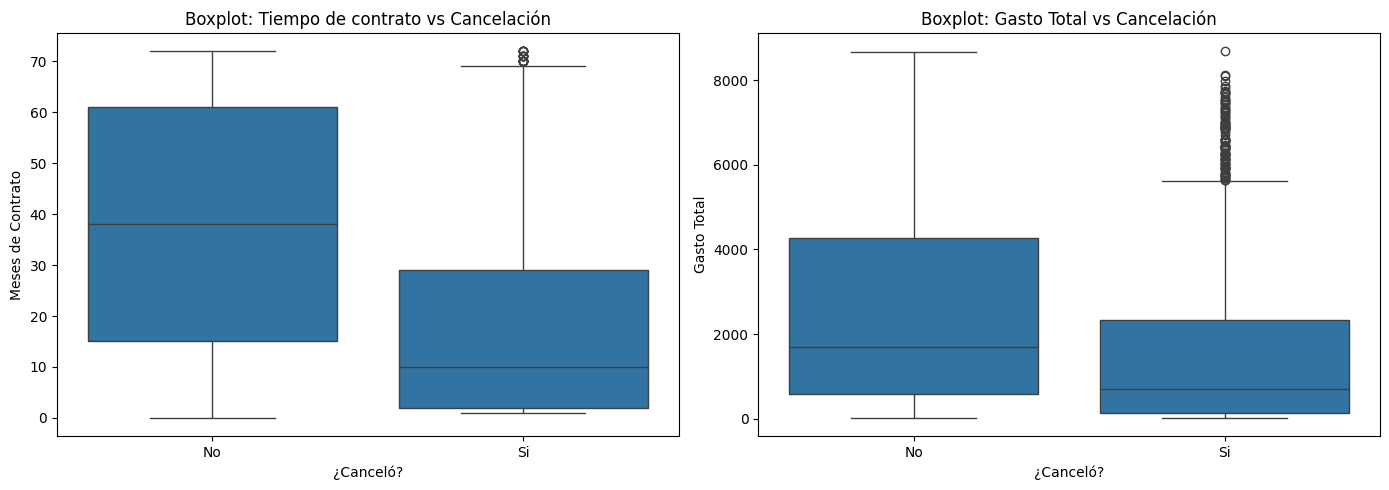

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(
    data=datos_codificados,
    x=datos_codificados['Churn'].map({0: 'No', 1: 'Si'}),
    y='tenure',
    ax=axes[0]
)
axes[0].set_title("Boxplot: Tiempo de contrato vs Cancelación")
axes[0].set_ylabel("Meses de Contrato")
axes[0].set_xlabel("¿Canceló?")

sns.boxplot(
    data=datos_codificados,
    x=datos_codificados['Churn'].map({0: 'No', 1: 'Si'}),
    y='Charges.Total',
    ax=axes[1]
)
axes[1].set_title("Boxplot: Gasto Total vs Cancelación")
axes[1].set_ylabel("Gasto Total")
axes[1].set_xlabel("¿Canceló?")

plt.tight_layout()
plt.show()

Tiempo de contrato (Análisis):
*   Los usuarios que abandonaron lo hicieron con una media de 9 meses, mientras que la media del usuario que no abandono es de unos 39 meses aprox.
*   Es posible identificar unos outliers de usuarios que abandonaron el servicio despues de los 70 meses, sin embargo el 75% de todos los usuarios que abandonaron lo hicieron antes de los 30 meses.

Gasto Total (Análisis):
*   Los usuarios que abandonaron gastaron en total una media inferior a los 1000, con el 75% de estos usuarios gastando menos de 3000. Mientras que los usuarios que no han abandonado han gastado en total una media de un poco menos de 2000.
*   Hay bastantos outliers para los usuarios que han abandonado la empresa y gastaron una cantidad superior a los 5500.

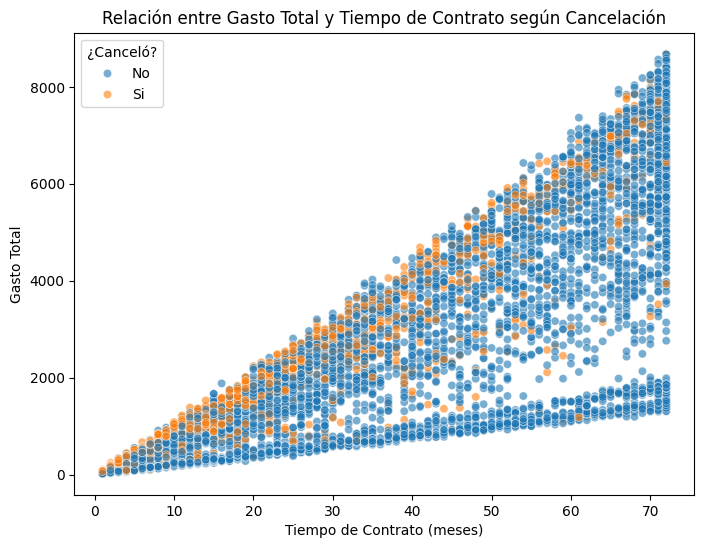

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=datos_codificados, x='tenure', y='Charges.Total', hue=datos_codificados['Churn'].map({0: 'No', 1: 'Si'}), alpha=0.6)
plt.title("Relación entre Gasto Total y Tiempo de Contrato según Cancelación")
plt.xlabel("Tiempo de Contrato (meses)")
plt.ylabel("Gasto Total")
plt.legend(title="¿Canceló?")
plt.show()

Se observa una tendencia positiva entre ambas variables numéricas, lo cual es esperable: a mayor tiempo de permanencia del cliente en la empresa, mayor tiende a ser el gasto total acumulado.

Sin embargo, también se evidencia que una proporción significativa de los clientes que cancelaron su contrato se concentra en la zona superior del gráfico, es decir, entre aquellos que registraron un gasto total elevado durante el tiempo que estuvieron activos.

# Modelado Predictivo

## Modelo 1 (Random Forest)

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay


def calcular_regresion(y_test,y_pred):
  rmse = mean_squared_error(y_test,y_pred)
  mae= mean_absolute_error(y_test,y_pred)
  r2 = r2_score(y_test,y_pred)
  metricas = {
      'RMSE':round(rmse**(1/2),4),
      'MAE': round(mae,4),
      'R2': round(r2,4)
  }
  return metricas


X = datos_codificados.drop(['Churn'],axis=1)
y = datos_codificados['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

modelo = RandomForestRegressor(max_depth=5, random_state=33)
modelo.fit(X_train,y_train)
ypred = modelo.predict(X_test)
resultados_rf = calcular_regresion(y_test,ypred)
resultados_rf


{'RMSE': 0.3716, 'MAE': 0.2734, 'R2': 0.2835}

### Importancia de variables

In [16]:
importances = modelo.feature_importances_
feature_importances = pd.DataFrame({'Features':X.columns,'Importances':(importances*100).round(2)}).sort_values('Importances',ascending=False)
feature_importances

,Features,Importances
19,Contract_Month-to-month,47.56
4,tenure,15.96
17,InternetService_Fiber optic,12.93
15,Charges.Daily,7.08
14,Charges.Total,6.83
24,PaymentMethod_Electronic check,1.87
5,PhoneService,1.34
20,Contract_One year,0.86
18,InternetService_No,0.81
11,StreamingTV,0.78


La variable mas significativa para predecir el churn, es si el tipo de contrato que tiene el cliente es mensual, seguida de los meses que lleva el cliente en la compañia y si el cliente tiene o no fibra optica contratada con la empresa.

In [17]:
resultados = pd.DataFrame(index=['RMSE','MAE','R2'])
model_features = RandomForestRegressor(max_depth=5,random_state=42)
ct_features = [i if i != 0 else 1 for i in range(0,35,5)]

for i in ct_features:
  selected_features = feature_importances['Features'].values[:i]
  X_train_sel = X_train[selected_features]
  X_test_sel = X_test[selected_features]
  model_features.fit(X_train_sel, y_train)
  y_pred = model_features.predict(X_test_sel)
  metricas = calcular_regresion(y_test,y_pred)
  resultados[i] = list(metricas.values())

resultados

,1,5,10,15,20,25,30
RMSE,0.4046,0.3742,0.3732,0.3726,0.3720,0.3719,0.3719
MAE,0.3270,0.2754,0.2739,0.2736,0.2735,0.2735,0.2735
R2,0.1509,0.2736,0.2776,0.2800,0.2822,0.2824,0.2824


In [18]:
resultados = pd.DataFrame(index=['RMSE','MAE','R2'])
model_features = RandomForestRegressor(max_depth=5,random_state=42)
ct_features = range(15,25)

for i in ct_features:
  selected_features = feature_importances['Features'].values[:i]
  X_train_sel = X_train[selected_features]
  X_test_sel = X_test[selected_features]
  model_features.fit(X_train_sel, y_train)
  y_pred = model_features.predict(X_test_sel)
  metricas = calcular_regresion(y_test,y_pred)
  resultados[i] = list(metricas.values())

resultados

,15,16,17,18,19,20,21,22,23,24
RMSE,0.3726,0.3723,0.3720,0.3718,0.3720,0.3720,0.3720,0.3720,0.3720,0.3719
MAE,0.2736,0.2734,0.2732,0.2732,0.2734,0.2735,0.2735,0.2735,0.2735,0.2735
R2,0.2800,0.2808,0.2819,0.2828,0.2822,0.2822,0.2821,0.2821,0.2822,0.2824


In [19]:
selected_features = feature_importances['Features'].values[:20]
X_selected_features = X[selected_features]
X_selected_features

X_train,X_test,y_train,y_test = train_test_split(X_selected_features,y,random_state=42)

param_grid = {
              'max_depth':[5,10,15],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[2,4,6],
              'n_estimators':[100,150,200]
             }



cv = KFold(n_splits=5, shuffle=True, random_state=42)
model_grid = GridSearchCV(RandomForestRegressor(random_state=42),
                          param_grid=param_grid, scoring='r2',
                          cv=cv)

model_grid.fit(X_train,y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [20]:
model_grid.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [21]:
y_pred_grid = model_grid.predict(X_test)
metricas_model_grid = calcular_regresion(y_test,y_pred_grid)
metricas_model_grid

{'RMSE': 0.3705, 'MAE': 0.2738, 'R2': 0.2889}

In [22]:
resultados['modelo_grid'] = list(metricas_model_grid.values())
resultados

,15,16,17,18,19,20,21,22,23,24,modelo_grid
RMSE,0.3726,0.3723,0.3720,0.3718,0.3720,0.3720,0.3720,0.3720,0.3720,0.3719,0.3705
MAE,0.2736,0.2734,0.2732,0.2732,0.2734,0.2735,0.2735,0.2735,0.2735,0.2735,0.2738
R2,0.2800,0.2808,0.2819,0.2828,0.2822,0.2822,0.2821,0.2821,0.2822,0.2824,0.2889


              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1301
           1       0.68      0.50      0.57       460

    accuracy                           0.81      1761
   macro avg       0.76      0.71      0.72      1761
weighted avg       0.80      0.81      0.80      1761



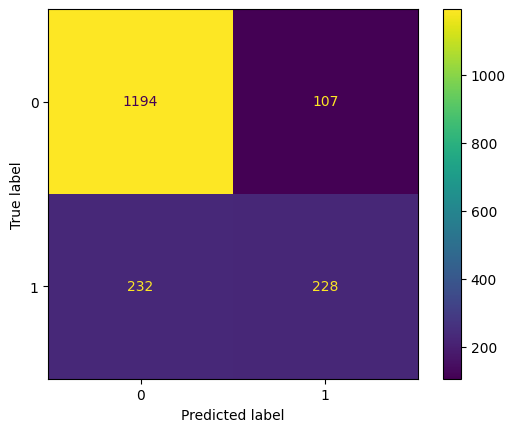

In [23]:
y_pred_grid = (y_pred_grid >= 0.5).astype(int)

print(classification_report(y_test,y_pred_grid))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_grid);


### Evaluación del modelo

A simple vista podemos ver que la matriz de confusión predice bastante bien los clientes que no abandonan la empresa, con un total de 1194 aciertos de 1301, sin embargo para la prediccion de clientes que abandonaron el modelo solo predice 232 correctamente de 460.

Analizando el reporte es posible ver lo siguiente:

Clientes que no abandonan:

* La precision del modelo en acertar a los clientes que no abandonan es del 84%, por lo que el modelo detectamente correctamente al 92% de los clientes que no abandonan, presentando un F1-score de 0.88.

Clientes que abandonan:

* La precisión del modelo en acertar a los clientes que abandonan es del 68%, haciendo que el modelo detecte correctamente al 50% de los clientes que abandonan, logrando un F1-score del 0.57




## Modelo 2 (KNN)

Para este modelo sera necesario, normalizar los datos y ademas botar datos que puedan contener valores Nan.

Ya que la mayoria de los datos numericos son 0s o 1s, pero las columnas de gastos totales pueden llegar hasta los 10,000 en valor, por lo que afectarian considerablemente los coeficientes y distancias que usa este modelo.

In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
import numpy as np


datos_codificados = datos_codificados.dropna()

X2 = datos_codificados.drop(['Churn'],axis=1)
y2 = datos_codificados['Churn']

X_train, X_test, y_train, y_test = train_test_split(X2,y2,test_size=0.3,random_state=42)

normalizacion = MinMaxScaler()
X_train_normalizado = normalizacion.fit_transform(X_train)
X_test_normalizado = normalizacion.transform(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train_normalizado, y_train)

y_pred_grid = knn.predict(X_test_normalizado)

resultado_importancia = permutation_importance(
    knn, X_test_normalizado, y_test, n_repeats=10, random_state=42
)

nombres_columnas = datos_codificados.drop(['Churn'], axis=1).columns
importancias = pd.Series(resultado_importancia.importances_mean, index=nombres_columnas)
importancias = importancias.sort_values(ascending=False)

print("Importancia estimada de variables (por permutación):")
print(importancias)

Importancia estimada de variables (por permutación):
tenure                                     0.009384
Contract_One year                          0.009052
Contract_Month-to-month                    0.007156
Charges.Daily                              0.006730
Charges.Total                              0.006540
gender                                     0.004976
InternetService_Fiber optic                0.004787
InternetService_DSL                        0.004645
SeniorCitizen                              0.004313
PaymentMethod_Electronic check             0.003791
StreamingMovies                            0.003460
PaperlessBilling                           0.003175
TechSupport                                0.002796
PaymentMethod_Mailed check                 0.001991
PaymentMethod_Credit card (automatic)      0.001991
OnlineSecurity                             0.001801
Contract_Two year                          0.000379
InternetService_No                        -0.000521
StreamingTV

### Importancia de variables

El modelo KNN se ve más influenciado por variables como tenure, tipo de contratos y gasto totales y diarios, mientras que variables como PhoneService o ciertos métodos de pago parecen no aportar valor predictivo.

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1554
           1       0.54      0.55      0.54       556

    accuracy                           0.76      2110
   macro avg       0.69      0.69      0.69      2110
weighted avg       0.76      0.76      0.76      2110



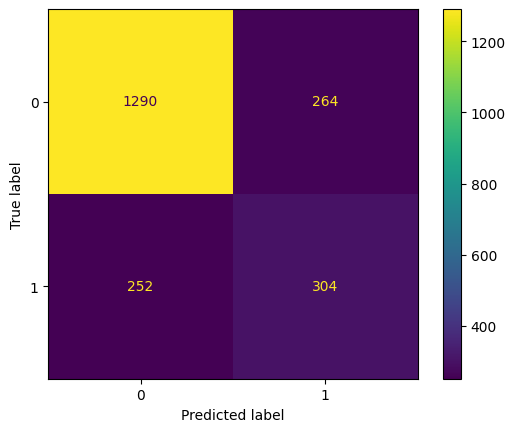

In [27]:
print(classification_report(y_test,y_pred_grid))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_grid);

### Evaluación del modelo

La matriz de confusión predice bastante bien los clientes que no abandonan la empresa, con un total de 1290 aciertos de 1554, sin embargo para la prediccion de clientes que abandonaron el modelo solo predice 304 correctamente de 556.

Analizando el reporte es posible ver lo siguiente:

Clientes que no abandonan:

* La precision del modelo en acertar a los clientes que no abandonan es del 84%, por lo que el modelo detectamente correctamente al 83% de los clientes que no abandonan, presentando un F1-score de 0.83.

Clientes que abandonan:

* La precisión del modelo en acertar a los clientes que abandonan es del 54%, haciendo que el modelo detecte correctamente al 55% de los clientes que abandonan, logrando un F1-score del 0.54



## Análisis critico de los modelos

Ambos modelos pueden predecir con una gran probabilidad los clientes que no abandonaran la empresa, sin embargo para predecir a los clientes que pueden abandonar la empresa ambos modelos presentan problemas.

Como nuestro objetivo es la prediccion de posibles clientes que abandonan la empresa nos concentraremos en esta seccion.

El modelo 1 predice con un 68% a los clientes, logrando identificar al 50% de los clientes.
El modelo 2 predice con un 54% a los clientes, logrando identificar al 55% de los clientes.

Por lo que el modelo 1 se desempeña mejor que el modelo 2, ya que comparando los F1-score tenemos que:

Modelo 1 (0.57) > Modelo 2 (0.54)

Aun asi este valor es bastante bajo, y claramente los modelos presentan un problema de underfitting, esto debido a la diferencia  en el volumen de datos, donde solo aproximadamente 1/5 de los datos son de clientes que abandonaron la empresa.

Aplicar un balanceo de datos podria generarnos modelos con mayor precision a la hora de identificar a los clientes que abandonaron, en particular el undersampling vendria bien con nuestros datos, ya que el oversampling podria generar ruido a la hora de identificar correctamente a los clientes que pueden abandonar la empresa.

# Interpretación y Conclusiones.



## Análisis de la Importancia de las Variables
Ambos modelos identificaron que las variables tenure y contract_Month-to-month estan entre el top 3 de variables mas importantes para la identificacion del churn.

Mientras que otras variables como Charges.Total, Charges.Daily, Contract_One year y InternetService_Fiber optic tambien influyen en la prediccion.


Y esto es coherente con la lógica del negocio: los clientes con contratos a largo plazo y más antigüedad presentan patrones distintos de cancelación, que aquellos que llevan poco tiempo y presentan contratos mensuales.

## Conclusión

La investigación y modelos nos presentan que las variables mas significativas para identificar el abandono de los clientes esta en los tipos de contrato que tienen y el tiempo que llevan en la empresa.

Los modelos construidos permiten identificar sin problemas al menos al 50% de los clientes que pueden abandonar, sin embargo es necesario obtener mas datos de clientes que abandonen ya que de esta forma la precision de estos modelos podria aumentar.

Sugiero estas dos estrategias para mejorar la retención de los clientes.

**Crear nuevos contratos (Estrategia 1):**

Sin duda el tipo de contrato influye directamente en si el cliente abandonara o no la empresa, ya que usuarios con contratos mensuales pueden abandonar al siguiente mes sin problemas, pero usuarios con contratos de mayor longitud pueden ser retenidos sin problemas.

Crear nuevos tipos de contrato, como por ejemplo de medio año de duración o quizas adoptar contratos de tipo trimestral, podrian hacer que los clientes tengan mas opciones a la hora de unirse a la empresa mejorando no solo la retención sino que el alcance.

**Incentivar la retención (Estrategia 2):**

Sin duda hoy en dia todas las empresas de telecomunicaciones prefieren apuntar a estrategias enfocadas al alcance de los clientes, ofreciendo mejores planes por los primeros meses o años.

Por lo que tratar de adoptar estrategias que beneficien a los usuarios que llevan mayor tiempo en la empresa, podria incentivar a otros a continuar en esta con el objetivo de recibir tambien ese tipo de incentivo.

